<a href="https://colab.research.google.com/github/victorjoseij/Machine_learning/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df = pd.read_csv("Customers.csv")
df.set_index(df.CustomerID,inplace=True,drop=True)
df["sp"] = df["Spending Score (1-100)"].apply(lambda x: 1 if x > 50 else 0 )
df.drop(['CustomerID'],axis=1,inplace=True)
df = df.rename({'Annual Income ($)':'income','Work Experience':'workex','Family Size':'famsize','Spending Score (1-100)':'spend'},axis=1)
df

,Gender,Age,income,spend,Profession,workex,famsize,sp
CustomerID,,,,,,,,
1,Male,19,15000,39,Healthcare,1,4,0
2,Male,21,35000,81,Engineer,3,3,1
3,Female,20,86000,6,Engineer,1,1,0
4,Female,23,59000,77,Lawyer,0,2,1
5,Female,31,38000,40,Entertainment,2,6,0
...,...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7,0
1997,Female,91,73158,32,Doctor,7,7,0
1998,Male,87,90961,14,Healthcare,9,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      2000 non-null   object
 1   Age         2000 non-null   int64 
 2   income      2000 non-null   int64 
 3   spend       2000 non-null   int64 
 4   Profession  1965 non-null   object
 5   workex      2000 non-null   int64 
 6   famsize     2000 non-null   int64 
 7   sp          2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 140.6+ KB


In [ ]:
## TASK 1 - BINNING
# Actual age is a continous variable, often expressed in discrete integers. For the purpose of this exercise, we convert age into given bins.

<Axes: xlabel='Age', ylabel='Count'>

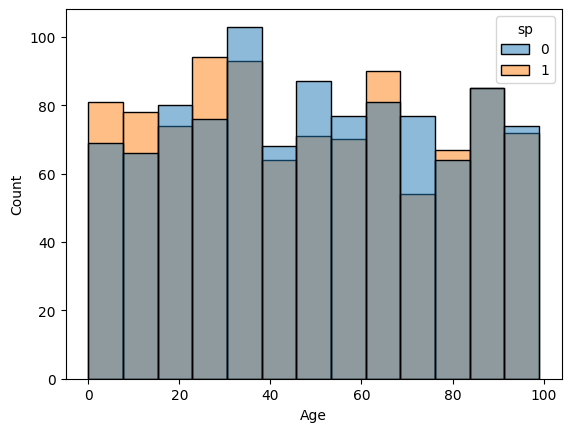

In [ ]:
bins = pd.IntervalIndex.from_tuples([(0, 18), (18, 26), (26, 36), (36, 46), (46, 56), (56, 66), (66, 76), (76, 86), (86, 100)])
binned = pd.cut(df.Age,bins=bins,right=False, labels = ["0-18", "18-26", "26-36", "36-46", "46-56", "56-66", "66-76", "76-86", "86-100"])
df['binned_age'] = binned
sns.histplot(x=df.Age,hue=df.sp) #CONTINOUS AGES

<Axes: ylabel='binned_age'>

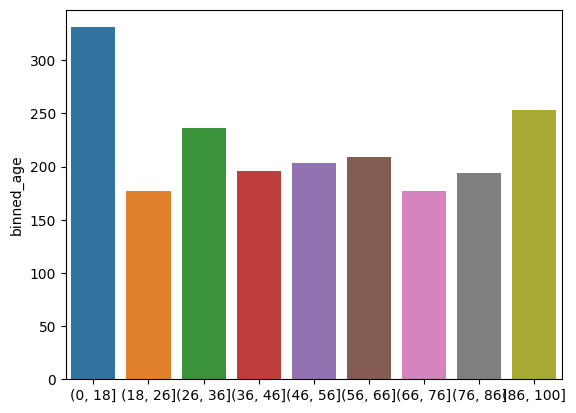

In [ ]:
sns.barplot(data=df,x =bins, y=df.binned_age.value_counts(sort=False))

In [ ]:
##TASK 2 - HANDLING CATEGORICAL VARIABLES
# We convert the categorical variables into dummies because the categories have to ordering.

In [ ]:
df.Profession.value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

In [ ]:
cat1 = [x for x in df.columns if str(df[x].dtype) == 'object']
cat2 = ['workex', 'famsize']

In [ ]:
df_d = pd.get_dummies(df, columns=cat1, dtype='int')

In [ ]:
## TEST FOR INDEPENDENCE.
# Two sample t-test for independence is done for unrelated independent samples drawn from the same population.
# Here we will use the two tail t-test because our assumption is that our mean is the same and we have to prove otherwise. No assumption is made about the direction of difference.
# i.e. The categorical variable has a significant effect on the means of the independent variable.
# The test suggests if the mean of the two samples are significantly different or not.
# The following assumptions are to be made for the data if un-paired t-test is to be applied:
# 1. Data values are independent and continuous, i.e., the measurement scale for data should follow a continuous pattern.
# 2. Data is normally distributed, i.e., when plotted, its graph resembles a bell-shaped curve.
# 3. Data is randomly sampled.
# 4. Variance of data in both sample groups is similar, i.e., samples have almost equal standard deviation (applicable for a two-sample t-test).

In [ ]:
# formula:
# t = [(u1 - u2)]/sqrt(var1/n1 + var2/n2)
# alpha = 0.05 (setting our tolerance threshold to 5%)

In [ ]:
## T-TEST
#H0: The sample means are the same
#H1: The sample means are different

In [ ]:
d1 = df[df['sp'] == 1]['income']
d2 = df[df['sp'] == 0]['income']

u1 = d1.mean()
u2 = d2.mean()
std1 = d1.std()
std2 = d2.std()
sem1 = scipy.stats.sem(d1)
sem2 = scipy.stats.sem(d2)

In [ ]:
count1 = len(d1)
count2 = len(d2)

t = ((u1) - (u2))/np.sqrt(std1**2/count1 + std2**2/count2)
t, std1, std2

(0.9340827858865405, 45419.69121730768, 46055.63688525908)

In [ ]:
# t-test table value
deg = count1 + count2 -2
alpha = 0.05
cv = scipy.stats.t.ppf(1.0 - alpha, deg)
p = (1.0 - scipy.stats.t.cdf(abs(t), deg)) * 2.0
cv, p

(1.6456166300576656, 0.3503740610103603)

In [ ]:
#verifying the result with scipy
import scipy
scipy.stats.ttest_ind(d1, d2, axis=0, equal_var=True)

Ttest_indResult(statistic=0.933991835489728, pvalue=0.3504209630832471)

In [ ]:
# CHI-SQUARE TEST FOR TESTING BETWEEN CATEGORIES

In [ ]:
# Manual method

In [ ]:
# SUM((O - E)**2/E) ~ chi2 distributed

In [ ]:
pd.crosstab(df.famsize,df.workex)

workex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
famsize,,,,,,,,,,,,,,,,,,
1,61,77,10,7,19,17,15,11,34,20,13,1,2,4,2,4,2,0
2,82,97,13,4,18,20,21,25,28,25,17,1,2,2,2,3,1,0
3,65,71,12,15,14,16,23,20,19,30,8,2,2,3,7,3,1,0
4,61,54,7,14,21,19,20,19,29,20,15,4,1,3,0,0,1,1
5,58,52,7,7,22,20,11,14,20,20,12,2,6,2,2,1,0,2
6,52,59,9,5,16,11,18,19,16,20,9,2,1,2,2,0,0,2
7,51,59,5,3,11,14,11,18,19,24,10,2,3,0,1,3,0,0
8,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(df.Gender,df.Profession)

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Gender,,,,,,,,,
Female,380,89,103,133,87,196,39,86,53
Male,232,72,76,101,66,143,21,56,32


In [ ]:
# Sklearn method

In [ ]:
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df['prof'] = lb.fit_transform(df[cat1[1]])
df['gend'] = lb.fit_transform(df[cat1[0]])
cat3 = ['prof','gend']

<Axes: >

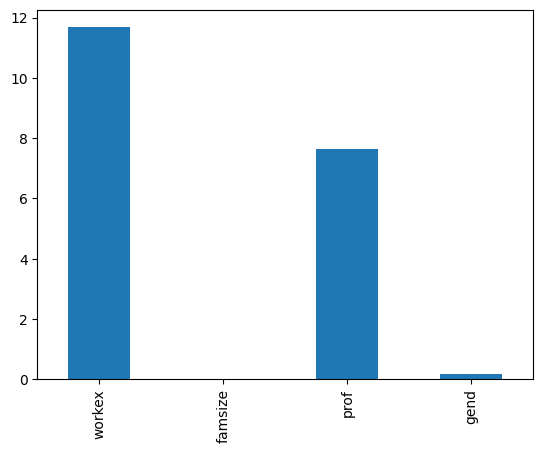

In [ ]:
c = cat2+cat3

X = df[c]
y = df.sp

chi_vals = chi2(X, y)
chi = pd.Series(chi_vals[0],index=c)
p = pd.Series(chi_vals[1],index=c)


chi.plot(kind='bar')

In [ ]:
# We see that work experience and profession play a significant role in deciding the movement of spending score.
# We, thus keep these two and eliminate the rest out of the table.

In [ ]:
# COVARIANCE MATRIX

In [ ]:
num = df[['Age','income','workex','prof','famsize','spend']]

In [ ]:
np.stack(num, axis = 0)

array(['Age', 'income', 'workex', 'prof', 'famsize', 'spend'], dtype='<U7')